# [CDAF] Atividade 2

## Nome e matrícula
Nome: Lucas Rocha Laredo

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2022 do FBRef.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Questão 1
- Baixe o dataset de resultados em https://fbref.com/en/comps/24/2022/schedule/2022-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e dif. xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [4]:
df = pd.read_csv('scores.csv')
df = df.rename(columns={'xG.1':'xG_against'})
df['xG_diff'] = df['xG'] - df['xG_against']
df

FileNotFoundError: [Errno 2] No such file or directory: 'scores.csv'

In [ ]:
df_nomes = df.sort_values('Home')
times = df_nomes['Home'].unique()[:20]
times

In [ ]:
for time in times:
    df_time = df.loc[df['Home'] == time]
    
    rolling_avg1 = df_time['xG'].rolling(window=5, min_periods=1).mean()
    rolling_avg2 = df_time['xG_against'].rolling(window=5, min_periods=1).mean()
    rolling_avg3 = df_time['xG_diff'].rolling(window=5, min_periods=1).mean()
    
    # Calcular a média geral
    media_geral1 = df['xG'].mean()
    media_geral2 = df['xG_against'].mean()
    media_geral3 = df['xG_diff'].mean()
    
    # Criar uma figura com dois eixos separados
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
    
    # Plotar o primeiro gráfico na primeira posição do eixo
    ax1.plot(df_time['xG'], label='xG pró: '+ time)
    ax1.plot(rolling_avg1, label='Moving Average (window=5)')
    ax1.axhline(media_geral1, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral1, 4)) + ')')
    ax1.legend()
    
    # Plotar o primeiro gráfico na primeira posição do eixo
    ax2.plot(df_time['xG_against'], label='xG contra: '+ time)
    ax2.plot(rolling_avg2, label='Moving Average (window=5)')
    ax2.axhline(media_geral2, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral2, 4)) + ')')
    ax2.legend()
    
    # Plotar o primeiro gráfico na terceira posição do eixo
    ax3.plot(df_time['xG_diff'], label='xG difference: '+ time)
    ax3.plot(rolling_avg3, label='Moving Average (window=5)')
    ax3.axhline(media_geral3, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral3, 4)) + ')')
    ax3.legend()
    
    plt.show()

### Times escolhidos:
    Atlético Mineiro, Flamengo, Palmeiras, Fluminense

In [ ]:
chosen = ['Atlético Mineiro', 'Flamengo', 'Fluminense', 'Palmeiras']

# comparativo xG pro, xG contra, xG diff
for time in chosen:
    df_time = df.loc[df['Home'] == time]
    
    rolling_avg1 = df_time['xG'].rolling(window=5, min_periods=1).mean()
    rolling_avg2 = df_time['xG_against'].rolling(window=5, min_periods=1).mean()
    rolling_avg3 = df_time['xG_diff'].rolling(window=5, min_periods=1).mean()
    
    # Calcular a média geral
    media_geral1 = df['xG'].mean()
    media_geral2 = df['xG_against'].mean()
    media_geral3 = df['xG_diff'].mean()
    
    # Criar uma figura com dois eixos separados
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
    
    # Plotar o primeiro gráfico na primeira posição do eixo
    ax1.plot(df_time['xG'], label='xG pró: '+ time)
    ax1.plot(rolling_avg1, label='Moving Average (window=5)')
    ax1.axhline(media_geral1, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral1, 4)) + ')')
    ax1.legend()
    
    # Plotar o primeiro gráfico na primeira posição do eixo
    ax2.plot(df_time['xG_against'], label='xG contra: '+ time)
    ax2.plot(rolling_avg2, label='Moving Average (window=5)')
    ax2.axhline(media_geral2, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral2, 4)) + ')')
    ax2.legend()
    
    # Plotar o primeiro gráfico na terceira posição do eixo
    ax3.plot(df_time['xG_diff'], label='xG difference: '+ time)
    ax3.plot(rolling_avg3, label='Moving Average (window=5)')
    ax3.axhline(media_geral3, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral3, 4)) + ')')
    ax3.legend()
    
    plt.show()

## Conclusões:

Os gráficos plotados acima permitem a análise de três parâmetros para 4 times diferentes do campeonato brasileiro de 2022. Em primeiro lugar, é importante mencionar um aspecto qualitativo desses dados. Os times analisados eram apontados como possíveis favoritos ao título da competição, dentro do senso comum, era um consenso que as equipes possuiam níveis técnicos muito similares. Foram consideradas as seguintes estatísticas: xG pró, xG contra e a diferença entre os parâmetros anteriores, ao longo de toda a competição. Além disso, foi traçada a média móvel ao longo do período, o que permite comparar o desempenho entre os intervalos, para ter uma noção mais precisa sobre as variações dos parâmetros. Note que essa análise pode fornecer dados sobre ataque e defesa das equipes, assim como o comportamento desses parâmetros ao longo do campeonato. É fundamental ter em mente que as flutuações são naturais, ou seja, tendem a acontecer ao longo das competições. O primeiro time a ser analisado será o Clube Atlético Mineiro, o atual campeão da competição


### Atlético Mineiro:

Começamos pela análise dos xG pró. Em tese, esses gráficos de análise tendem a fornecer dados sobre o potêncial ofensivo das equipes. Note que, como atual campeão, o início do campeonato para o Atlético Mineiro apresentou um xG muito superior à média geral, ou seja, era tido como um ataque com altíssimo potencial ofensivo. Contudo, perceba que, ao longo do campeonato, o xG sofreu um queda considerável, chegando em níveis muito inferiores à média. Note que a média móvel para os 5 jogos teve um comportamento de queda praticamente em toda a primeira metade do campeonato. O que isso indica é que, a cada partida, a expectativa de gols da equipe apenas diminuia. Ao fim do campeonato, essa tendência se invertou, apresentando um crescimento no terço final.
Em relação ao xG contra, a expectativa em relação à esse gráfico de análise é fornecer dados referentes à qualidade defensiva da equipe, ou seja, essa é muito suscetível à tomar gols? Note que para esse parâmetro o ideal é sempre ficar abaixo da média geral, uma vez que, quanto maior, maior é a expectativa de sofrer gols. O Atlético Mineiro esteve abaixo da média geral por boa parte do campeonato, assim como a partir do segundo quarto do campeonato a média móvel teve um comportamento decrescente em grande parte do período. Algo notável é o xG contra alto nas primeiras partidas do campeonato. O comportamento apresentado pela média móvel no primeiro quarto é oposto ao do xG pró. Ou seja, a expectativa de sofrer com ataques inimigos era crescente, enquanto de marcar era decrescente. Isso é um indicador do mal desempenho da equipe.
Por fim, a diferença entre os xG's é um INDICADOR de vitória. Ou seja, um xG do time analisado maior do que seus rivais indica que ele está mais favorável à fazer gols, ou seja, está também mais favorável à sair favorito. Essa é uma aproximação muito pouco eficiente, e funciona para análises extramamente superficiais. Com isso em mente, confirma-se o que foi analisado anteriormente: A primeira metade da competição foi um período de decrescimento do potencial ofensivo da equipe, com um aumento do xG contrário. Entretanto, como indicado pela média móvel, a partir da segunda metade da competição o comportamento se inverteu, o que é demonstrado pelo crescimento nesse parâmetro

### Flamengo

Imediatamente, percebe-se um comportamento muito distindo do clube analisado anteriormente no gráfico de xG pró. O Flamengo esteve acima da média geral durante praticamente toda a competição. O quarto final foi parte decrescente da média móvel, o que indica uma queda no potencial ofensivo, mas note que a equipe sempre teve uma alta expectativa de gols. Esse dado fornece argumentos para afirmar que o ataque da equipe é extremamente poderoso, oferecendo risco aos adversários. Além disso, perceba o grande poder defensivo do Flamengo. O gráfico de xG contra também apresentou uma média móvel INTEGRALMENTE abaixo da média geral. Ainda que apresente momentos de crescimento e outros de decrescimento, ao longo de toda a competição ela se manteve abaixo da média dos outros clubes. Ou seja, novamente, essas são evidências para a alta qualidade defensiva da equipe. Por fim, a diferença entre os xG's confirma o que se observou nos gráficos anteriores. O alto potencial ofensivo e a baixa tendência de sofrer gols demonstrou que o Flamengo apresenta como mais favorável à fazer gols do que a equipe contrária ao longo da maior parte das partidas. Portanto, o que essa análise indica é que o Flamengo se confirma como um dos principais favoritos do campeonato e que apresentou um desempenho melhor do que o Atlético Mineiro, equipe analisada anteriormente.

### Fluminense

O Fluminense apresentou um comportamento semelhante ao do Atlético Mineiro em relação ao xG pró ao longo da competição. Houveram fases de crescimento e decrescimento da média móvel, o que demonstra, em partes, um comportamento inconstante. Note que em boa parte do campeonato brasileiro a média móvel esteve abaixo da média móvel. Entretanto, mais ou menos na métade do campeonato houve um crescimento considerável, mas que não se manteve. O xG contrário apresentou um comportamento distinto. Apenas de nem sempre estar abaixo da média móvel, ele teve um comportamento mais consistente em relação à sua qualidade, ou seja, se manteve a maior parte do tempo abaixo dos níveis de limite (média geral). Pelos gráficos, percebe-se uma semelhança com o Clube Atlético Mineiro, entretanto, é notável que em escalas diferentes. Para essa competição, confirma-se o maior favoritismo do galo em relação ao Fluminense, mas uma vantagem muito pequena.

### Palmeiras
Junto com o Flamengo, Palmeiras era o principal favorito dessa competição. Os gráficos apresentados apenas confirmam esse favoritismo. Note que em relação aos xG pró, os níveis mantidos pela média móvel sempre estiveram consideravelmente acima da média geral, e o comportamento dessa função foi bastante consistente ao longo da competição, apesar de apresentar momentos de queda, os seus valores sempre foram bastante expressivos. O mesmo pode ser dito para os xG contra. O palmeiras apresentou os níveis mais baixos desses parâmetros entre todos os análisados, e a média móvel teve um comportamento de queda durante quase toda a competição. Ou seja, o Palmeiras apresentou um EXCELENTE comportamento defensivo, com uma baixíssima (e decrescente) expectativa de sofrer gols. Apenas para confirmar, a diferença entre os xG's demonstra o nível superior dessa equipe, estando acima da média geral em TODA a competição, com a média móvel estando MUITO distante da referência. Os dados do gráfico fornecem conteúdo bastante consistente para confirmar a superioridade do Palmeiras ao longo da competição, essa que ele se sagrou campeão.


## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela à outra?

In [ ]:
# comparativo xG pro, xG contra, xG diff
for time in chosen:
    df_time = df.loc[df['Home'] == time]
    
    rolling_avg1 = df_time['xG'].rolling(window=10, min_periods=1).mean()
    rolling_avg2 = df_time['xG_against'].rolling(window=10, min_periods=1).mean()
    rolling_avg3 = df_time['xG_diff'].rolling(window=10, min_periods=1).mean()
    
    # Calcular a média geral
    media_geral1 = df['xG'].mean()
    media_geral2 = df['xG_against'].mean()
    media_geral3 = df['xG_diff'].mean()
    
    # Criar uma figura com dois eixos separados
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
    
    # Plotar o primeiro gráfico na primeira posição do eixo
    ax1.plot(df_time['xG'], label='xG pró: '+ time)
    ax1.plot(rolling_avg1, label='Moving Average (window=5)')
    ax1.axhline(media_geral1, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral1, 4)) + ')')
    ax1.legend()
    
    # Plotar o primeiro gráfico na primeira posição do eixo
    ax2.plot(df_time['xG_against'], label='xG contra: '+ time)
    ax2.plot(rolling_avg2, label='Moving Average (window=5)')
    ax2.axhline(media_geral2, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral2, 4)) + ')')
    ax2.legend()
    
    # Plotar o primeiro gráfico na terceira posição do eixo
    ax3.plot(df_time['xG_diff'], label='xG difference: '+ time)
    ax3.plot(rolling_avg3, label='Moving Average (window=5)')
    ax3.axhline(media_geral3, linestyle='--', color='gray', label='Media geral (' + str(round(media_geral3, 4)) + ')')
    ax3.legend()
    
    plt.show()

Uma série temporal com uma janela de jogos maior apresenta um comportamento mais "generalizado" dos dados. O que isso significa é que quanto menor a janela, mais próximo a curva de média geral seja dos pontos plotados naquele intervalo. Portanto, aumentar a janela fornece uma curva com menos granuralidade, que apresenta as tendências (de crescimento, por exemplo) com menos sutilezas. Portanto, se quisermos analisar períodos mais específicos da competição, é melhor uma janela menor de jogos, contudo, caso o interesse seja em algo mais geral de toda a competição, uma janela de 10 partidas pode ser mais favorável.

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2022/stats/2022-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios à partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [16]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
#used for plots
from scipy import stats
from mplsoccer import PyPizza, FontManager

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [ ]:
df_info = pd.read_csv('players.csv')
df_info

In [ ]:
# striker's DataFrame
df_fw = df_info.loc[df_info['Pos'] == 'FW']
df_fw['PC_Rate'] = df_fw.apply(
    lambda row: 0 if row['PKatt_PERF'] == 0 else row['PK_PERF'] / row['PKatt_PERF'], axis=1)
df_fw

In [ ]:
# df per 90 min

df_fw_90 = df_fw[['Player', 'Gls_P90', 'Ast_P90', 'G+A_P90','G+A-PK_P90','xG_P90','xAG_P90', 'xG+xAG_P90','npxG_P90','npxG+xAG_P90', 'PC_Rate']].dropna()
df_fw_90['PrgR_P90'] = df_fw['PrgR_PROG'] * 90 / df_fw['Min_PT'] # PrgR per 90 minutes
df_fw_90

In [ ]:
# normalized df per 90 min

cols_norm = ["xG_P90", "xAG_P90", "PrgR_P90", "Ast_P90", "Gls_P90", "PC_Rate"]
df_fw_90_norm = df_fw_90
df_fw_90_norm[cols_norm] = (df_fw_90[cols_norm] - df_fw_90[cols_norm].min()) / (df_fw_90[cols_norm].max() - df_fw_90[cols_norm].min())
df_fw_90_norm

In [ ]:
def calculatePercentiles(player):
    #only his statistics
    p = df_fw_90_norm.loc[df_fw["Player"] == player]
    #columns similar together
    p = p[["xG_P90", "xAG_P90", "PrgR_P90", "Ast_P90", "Gls_P90", "PC_Rate"]]
    #take only necessary columns - exclude playerId
    df_fw_90_columns = p.columns[:]
    #values to mark on the plot
    values = [round(p[column].iloc[0],2) for column in df_fw_90_columns]
    #percentiles
    percentiles = [int(stats.percentileofscore(df_fw_90_norm[column], p[column].iloc[0])) for column in df_fw_90_columns] 
    print(percentiles)
    return [percentiles, values]
    
def plotGraph(lst_val, player):
    #list of names on plots
    # names = ["xG_EXPEC", "xAG_EXPEC", "PrgR_PROG", "Ast_PERF", "Gls_PERF"]
    names = ["xG per 90 Minutes", "xAG per 90 Minutes", "PrgR per 90 Minutes", "Assists per 90 Minutes", "Goals per 90 Minutes", "Penalty Conversion Rate"]
    slice_colors = ["blue"] * 2 + ["green"] * 1 + ["red"] * 2 + ["purple"] * 1
    text_colors = ["white"]*6
    font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                               "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
    font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                             "RobotoSlab%5Bwght%5D.ttf?raw=true"))
    #PIZZA PLOT
    baker = PyPizza(
        params=names,
        min_range = None,
        max_range = None,               # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )
    #making pizza for our data
    fig, ax = baker.make_pizza(
        lst_val[0],              # list of values
        figsize=(10, 10),      # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors = text_colors,
        value_bck_colors=slice_colors, # where the parameters will be added
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    #putting text
    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(lst_val[1][i]))
    # add title
    fig.text(
        0.515, 0.97, player +" per 90 minutes" , size=18,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Campeonato Brasileiro | Season 2022",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )
    plt.show()

In [ ]:
players = ['Hulk', 'Gabriel Barbosa', 'Yuri Alberto']
for player in players:
    plotGraph(calculatePercentiles(player), player)

### Explicações e Análise

- *Normalização*:
   O critério utilizado foi a técnica de normalização 'min-max' entre todos os jogadores daquela posição, no caso, atacantes.
- *Atributos Escolhidos*:
    Os atributos selecionados visaram observar a capacidade dos atacantes em fazer gols, ou ainda, o perigo que oferece como um atacante, mas também a capacidade de servir seus companheiros com assistências e de receber passes progressivos, o que pode demonstrar um bom posicionamento, além da taxa de conversão de penaltis.
- *Análise*: Chegamos à análise: Fica evidente às semelhanças entre os jogadores Hulk e Gabriel Barbosa nos aspectos analizados. Ambos são jogadores bastante completos, que ocupam posições médias ou superiores em todos os atributos. Entretanto, perceba o quanto Hulk também atua como um "assistente" aos seus companheiros. Diferentemente de Gabriel e Yuri Barbosa, Hulk ocupa uma posição muito superior de assistências. Contudo, em relação ao xG, Hulk se aproxima de Yuri, entrentanto, o jogador do Flamengo se destada nesse aspecto, oferecendo mais risco aos adversários. Outro fator predominante do atleta atleticano é a maior taxa de recepção de passes progressivos entre os demais. Algo que pode explicar essa característica é o seu físico, predominante em relação aos demais, Hulk tem opções, facilitando a recepção de bolas. Por fim, É importante evidenciar que Yuri Barbosa não cobrou penaltis na temporada, portanto, esse atributo pode ser desconsiderado para o atleta. Contudo, apesar da alta taxa de conversão de Gabriel, Hulk marcou em todas as suas tentativas, demonstrando o poder do jogador nas cobranças de penalidade.
    

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

In [6]:
# Assists, PrgC, xAG, completed passes avg, passes into final third
df_info_passes = pd.read_csv('player_passes.csv')
df_info_passes

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,KP,1/3,PPA,CrsPA,PrgP,Matches,-9999,Tkl,TklW,Tkl%
0,1,Abner,br BRA,DF,Atl Paranaense,21,2000,23.4,986.0,1283.0,...,31.0,105.0,16.0,6.0,139.0,Matches,7f9c5d2d,43.0,28,63.2
1,2,Adryelson,br BRA,DF,Botafogo (RJ),23,1998,16.1,540.0,662.0,...,3.0,15.0,0.0,0.0,20.0,Matches,e980e78d,17.0,12,80.0
2,3,Adson,br BRA,FWMF,Corinthians,21,2000,13.8,522.0,633.0,...,14.0,34.0,29.0,2.0,72.0,Matches,eda38706,34.0,22,54.5
3,4,Airton,br BRA,FW,Atl Goianiense,22,1999,19.3,277.0,444.0,...,30.0,20.0,17.0,9.0,29.0,Matches,751ef075,32.0,24,38.5
4,5,Carlos Alberto,br BRA,FWMF,América (MG),19,2002,1.7,13.0,24.0,...,1.0,0.0,0.0,0.0,0.0,Matches,08f48d96,1.0,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,759,Yago,br BRA,MFDF,Fluminense,26,1995,12.6,469.0,604.0,...,14.0,45.0,10.0,5.0,38.0,Matches,e2add0e7,22.0,13,65.2
759,760,Ytalo,br BRA,FW,Bragantino,34,1988,6.9,89.0,101.0,...,4.0,3.0,3.0,0.0,11.0,Matches,423e3d0b,3.0,3,25.0
760,761,Marcos Ytalo,br BRA,DF,Ceará,25,1996,1.8,45.0,58.0,...,3.0,2.0,2.0,1.0,6.0,Matches,70053afc,4.0,3,0.0
761,762,Vinícius Zanocelo,br BRA,MF,Santos,21,2001,22.3,767.0,914.0,...,21.0,80.0,7.0,1.0,102.0,Matches,"2,75E+87",29.0,17,21.7


In [8]:
# striker's DataFrame
df_mf = df_info_passes.loc[df_info_passes['Pos'] == 'MF']
df_mf

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,KP,1/3,PPA,CrsPA,PrgP,Matches,-9999,Tkl,TklW,Tkl%
6,7,Ale,br BRA,MF,América (MG),31,1990,21.4,939.0,1110.0,...,21.0,125.0,15.0,3.0,144.0,Matches,b7d9347d,50.0,21,51.4
11,12,Caio Alexandre,br BRA,MF,Fortaleza,22,1999,11.0,489.0,579.0,...,9.0,57.0,5.0,0.0,69.0,Matches,08ac23b7,39.0,22,51.2
15,16,Allan,br BRA,MF,Atlético Mineiro,24,1997,30.4,1772.0,2081.0,...,19.0,226.0,21.0,1.0,201.0,Matches,b15e93aa,47.0,30,48.0
25,26,André,br BRA,MF,Fluminense,20,2001,33.5,2268.0,2458.0,...,28.0,219.0,11.0,3.0,200.0,Matches,ec604e2c,55.0,38,40.7
27,28,Andrey,br BRA,MF,Avaí,19,2002,0.3,4.0,7.0,...,1.0,1.0,0.0,0.0,1.0,Matches,89c28d9f,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,Wendell,br BRA,MF,Ceará,19,2002,0.1,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,Matches,82b7e058,1.0,1,NaN
748,749,Wescley,br BRA,MF,Ceará,30,1991,0.8,20.0,23.0,...,1.0,3.0,0.0,0.0,8.0,Matches,5a43c680,3.0,2,50.0
750,751,Weverson,br BRA,MF,Bragantino,21,2000,0.5,7.0,11.0,...,1.0,0.0,0.0,0.0,1.0,Matches,b9829bf7,0.0,0,NaN
756,757,Xavier,br BRA,MF,Corinthians,21,2000,1.8,62.0,73.0,...,2.0,4.0,0.0,0.0,7.0,Matches,f16ed217,3.0,1,75.0


In [9]:
# Assists, PrgP, completed passes avg, passes into final third, tackles won, tackles won against dribblers

df_mf_interest = df_mf[['Player', 'Ast', 'PrgP', '1/3', 'KP','TklW', 'Tkl%']].dropna()
df_mf_interest

,Player,Ast,PrgP,1/3,KP,TklW,Tkl%
6,Ale,2,144.0,125.0,21.0,21,51.4
11,Caio Alexandre,0,69.0,57.0,9.0,22,51.2
15,Allan,0,201.0,226.0,19.0,30,48.0
25,André,1,200.0,219.0,28.0,38,40.7
38,Eduard Atuesta,0,43.0,30.0,12.0,7,17.6
...,...,...,...,...,...,...,...
727,Caio Vinícius,0,42.0,28.0,5.0,23,34.3
741,José Welison,0,90.0,103.0,13.0,22,48.1
748,Wescley,0,8.0,3.0,1.0,2,50.0
756,Xavier,0,7.0,4.0,2.0,1,75.0


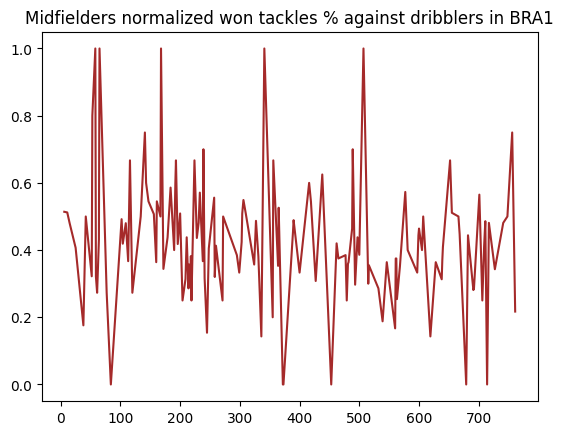

In [41]:
#normalizing

cols_norm = ["Ast", "PrgP", "1/3", "KP", "TklW", "Tkl%"]
df_mf_norm = df_mf_interest
df_mf_norm[cols_norm] = (df_mf_interest[cols_norm] - df_mf_interest[cols_norm].min()) / (df_mf_interest[cols_norm].max() - df_mf_interest[cols_norm].min())
df_mf_norm

plt.title('Midfielders normalized won tackles % against dribblers in BRA1')
df_mf_norm['Tkl%'].plot(color='brown', linestyle='-')
plt.savefig('tklperc_norm.png')

In [46]:
def calculatePercentiles(player):
    #only his statistics
    p = df_mf_norm.loc[df_mf["Player"] == player]
    #columns similar together
    p = p[["Ast", "PrgP", "1/3", "KP", "TklW", "Tkl%"]]
    #take only necessary columns - exclude playerId
    df_mf_norm_col = p.columns[:]
    #values to mark on the plot
    values = [round(p[column].iloc[0],2) for column in df_mf_norm_col]
    #percentiles
    percentiles = [int(stats.percentileofscore(df_mf_norm[column], p[column].iloc[0])) for column in df_mf_norm_col] 
    print(percentiles)
    return [percentiles, values]

def plotGraph(lst_val, player, i):
    #list of names on plots
    names = ["Assists", "Progressive Passes", "Passing into final third", "Key Passes", "Tackles Won", "% of dribblers tackled"]
    slice_colors = ["blue"] * 1 + ["green"] * 3 + ["red"] * 2
    text_colors = ["white"]*6
    font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                               "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
    font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                             "RobotoSlab%5Bwght%5D.ttf?raw=true"))
    #PIZZA PLOT
    baker = PyPizza(
        params=names,
        min_range = None,
        max_range = None,               # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )
    #making pizza for our data
    fig, ax = baker.make_pizza(
        lst_val[0],              # list of values
        figsize=(10, 10),      # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors = text_colors,
        value_bck_colors=slice_colors, # where the parameters will be added
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    #putting text
    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(lst_val[1][i]))
    # add title
    fig.text(
        0.515, 0.97, player +" stats" , size=18,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Campeonato Brasileiro | Season 2022",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )
    i = i + 1
    plt.savefig(str(i)+'.png')    
    plt.show()

[30, 99, 99, 75, 88, 64]


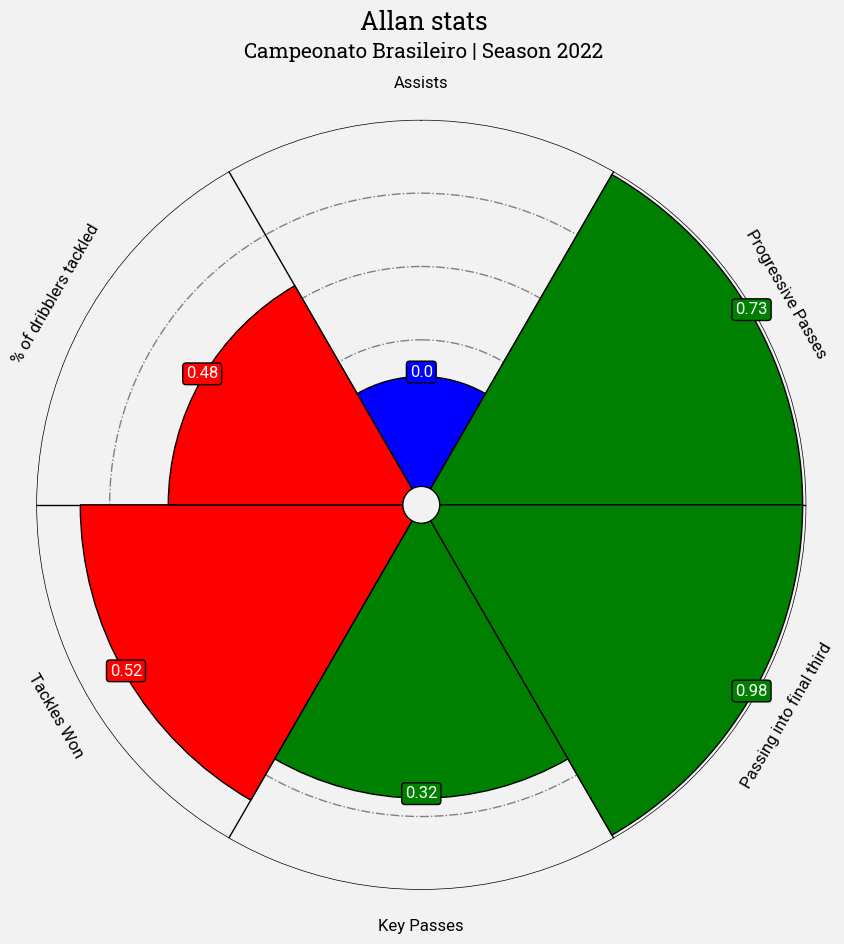

[100, 86, 72, 99, 80, 35]


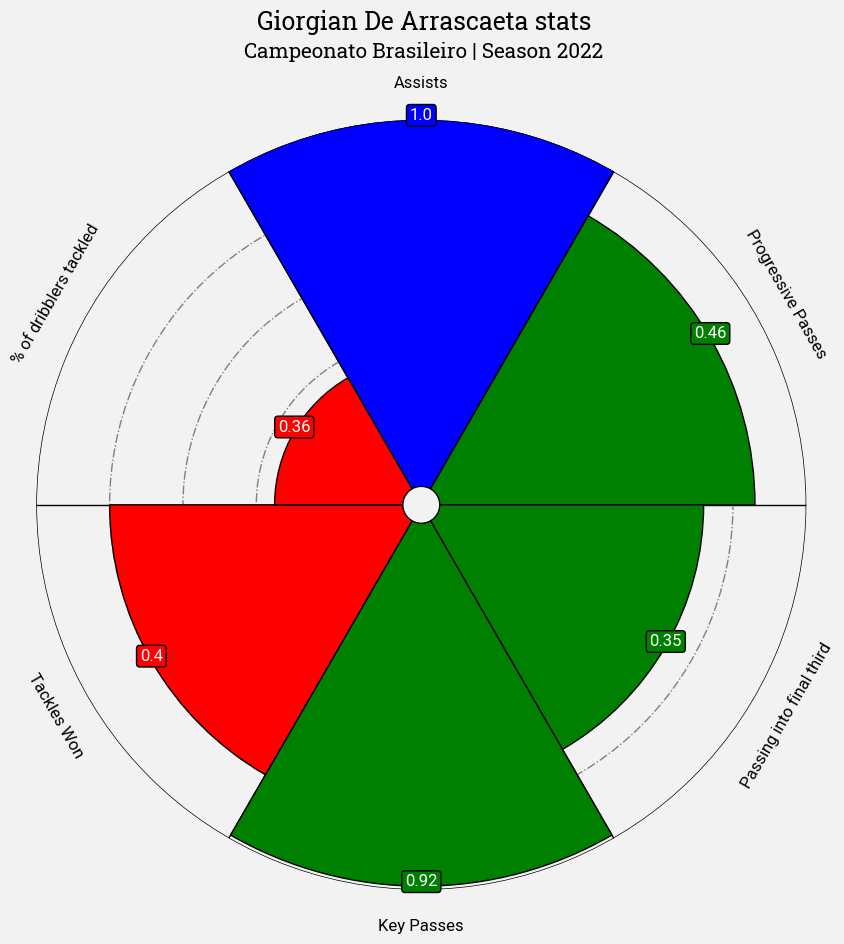

[92, 58, 51, 84, 42, 49]


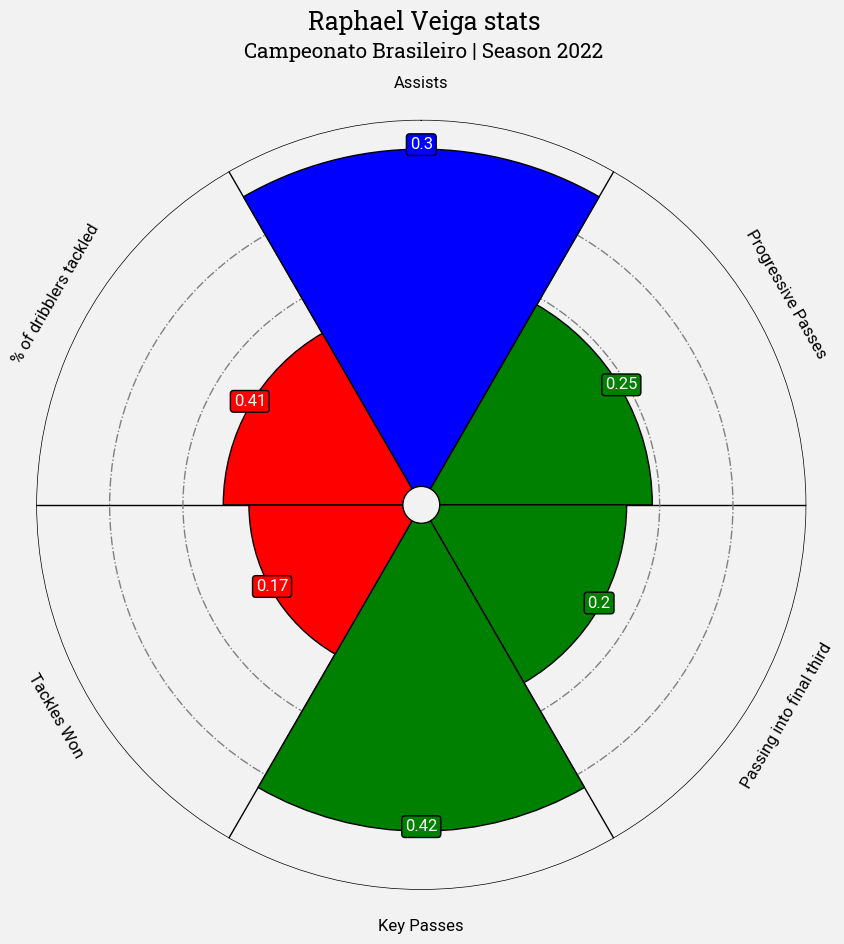

In [51]:
# ["Assists", "Progressive Passes", "Passing into final third", "Key Passes", "Tackles Won", "% of dribblers tackled"]
players = ['Allan', 'Giorgian De Arrascaeta', 'Raphael Veiga']
for player in players:
    plotGraph(calculatePercentiles(player), player, 1)

### Explicações e Análise
- *Normalização*:
   Novamente, o critério de normalização foi o mesmo utilizado anteriormente. Foi utilizada a técnica de normalização 'min-max' entre todos os jogadores daquela posição, no caso, meio campistas.
- *Atributos Escolhidos*:
    O conjunto de atributos escolhido para essa análise objetivava capturar diferentes aspectos dos jogadores. Justamente por esse motivo, foram selecionados jogadores que, apesar de meio campistas, atuam em posições distintas. Ou seja, o número de assistências, passes progressivos, passes em direção ao terço final  e passes chave são atributos relacionados à "camisas 10", ou seja, meio campistas com características de armadores. Em contradição, os atributos, divididas vencidas e % de 'dribblers' desarmados são mais relacionados à jogadores com aspectos mais defensivos. Portanto, selecionamos esse conjunto para evidenciar as diferentes características de atletas que atuam em posições centrais do campo e que desempenham funções bastante distintas.
- *Análise*: Chegamos à análise: As diferenças entre os atletas selecionados ficou bastante evidente. Note como o Allan possui um aspecto muito mais defensivo, salientado pelos atributos de defesa apresentado. O atleta do Atlético Mineiro ocupa percentis superiores nesses atributos do que os demais jogadores. Além disso, é evidenciado o quão fundamental ele é na construção de jogadas no meio campo, participando de passes progressivos e passes ao terço final. Por outro lado, Raphael Veiga e Arrascaeta possuem características semelhantes, sendo fundamentais nos passes chave, ou seja, que levam aos gols. Arrascaeta é o líder de assistências no campeonato (percentil 100), demonstrando seu valor. Além disso, ocupa posição elevada nos passes chave. Veiga, assim como Arrascaeta, é fundamental e dá muitas assistências aos seus companheiros.
    

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

In [ ]:
df_info_def = pd.read_csv('players_def.csv')
df_info_def

In [ ]:
# striker's DataFrame
df_df = df_info_def.loc[df_info_def['Pos'] == 'DF']
df_df

# Cmp%, PrgP, Tkl%, Def 3rd, Int, Sh
df_df_interest = df_df[['Player', 'Cmp%', 'PrgP', 'Tkl%','Def 3rd','Int', 'Sh']].dropna()
df_df_interest

In [ ]:
# normalizing

cols_norm = ['Cmp%', 'PrgP', 'Tkl%','Def 3rd','Int', 'Sh']
df_df_norm = df_df_interest
df_df_norm[cols_norm] = (df_df_interest[cols_norm] - df_df_interest[cols_norm].min()) / (df_df_interest[cols_norm].max() - df_df_interest[cols_norm].min())
df_df_norm

In [ ]:
def calculatePercentiles(player):
    #only his statistics
    p = df_df_norm.loc[df_df["Player"] == player]
    #columns similar together
    p = p[['Cmp%', 'PrgP', 'Tkl%','Def 3rd','Int', 'Sh']]
    #take only necessary columns - exclude playerId
    df_df_norm_col = p.columns[:]
    #values to mark on the plot
    values = [round(p[column].iloc[0],2) for column in df_df_norm_col]
    #percentiles
    percentiles = [int(stats.percentileofscore(df_df_norm[column], p[column].iloc[0])) for column in df_df_norm_col] 
    print(percentiles)
    return [percentiles, values]

def plotGraph(lst_val, player):
    #list of names on plots
    names = ['Pass Completion Rate Long', 'Progressive Passes', 'Tackles Won Rate','Tackles in the Defensive third','Interceptions', 'Shots Blocked']
    slice_colors = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
    text_colors = ["white"]*6
    font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                               "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
    font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                             "RobotoSlab%5Bwght%5D.ttf?raw=true"))
    #PIZZA PLOT
    baker = PyPizza(
        params=names,
        min_range = None,
        max_range = None,               # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )
    #making pizza for our data
    fig, ax = baker.make_pizza(
        lst_val[0],              # list of values
        figsize=(10, 10),      # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors = text_colors,
        value_bck_colors=slice_colors, # where the parameters will be added
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    #putting text
    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(lst_val[1][i]))
    # add title
    fig.text(
        0.515, 0.97, player +" stats" , size=18,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Campeonato Brasileiro | Season 2022",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )
    plt.show()

In [ ]:
players = ['Júnior Alonso', 'David Luiz', 'Nathan Silva']
for player in players:
    plotGraph(calculatePercentiles(player), player)

### Explicações e Análise

- *Normalização*:
   Novamente, o critério de normalização foi o mesmo utilizado anteriormente. Foi utilizada a técnica de normalização 'min-max' entre todos os jogadores daquela posição, no caso, defensores.
- *Atributos Escolhidos*:
    Os atributos selecionados envolvem características básicas de defensores, como a capacidade de duelos (tackles), interceptações e chutes bloqueados, mas também existiu o objetivo de perceber como os defensores podem participar da criação de jogadas, por meio de passes progressivos e passes longos concluidos. Sendo assim, esse conjunto de atributo busca compreender o quanto os defensores podem, além de performar em sua posição natural, participar dos ataques da equipe.
- *Análise*: Chegamos à análise: Em um primeiro momento, fica bastante evidente a diferença de duelos vencidos entre os três jogadores. Júnior Alonso ocupa posição muito abaixo dos demais, demonstrando que não é um jogador de duelos generalizados. Contudo, se trazemos para o terço final, vida evidente que a situação muda. O jogador é fundamental para duelos próximos à sua área, assim como é um bom jogador na criação de jogadas, ocupando boas posições de passes progressivos e longos. Nathan Silva também é apresentado como um defensor completo, ocupando posições médias em todos os atributos selecionados. Por outro lado, David Luiz ocupa posições superiores em relação aos atributos de criação, contudo, é inferior aos demais no aspecto defensivo, o que chama atenção é a baixa posição ocupada em duelos vencidos no terço final, contrário à Alonso, e interceptações.
    

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

Cada posição possui um conjunto de atributos que descreve melhor o conjunto de tarefas que os atletas devem desempenhar. Portanto, é impossível generalizar um gráfico para todos os jogadores, uma boa comparação deve ser entre profissionais semelhantes, que realizam tarefas semelhantes com rivais parecidos. Portanto, é essencial boas técnicas de normalização assim como uma boa escolha dos atributos analisados. Para posições ofensivas, devem ser considerados aspectos como número de finalizações, gols, gols esperados, etc. Para defensores, é importante conferir tackles, interceptações, ou seja, ações que impedem o adversário de fazer gols. O meio campo é um espectro maior do campo, portanto, existe uma diversidade maior de atributos que podem cobrir os jogadores dessas posições. Mas o mais importante é que sempre é possível extrapolar, ou seja, criar novas interpretações não convencionais, por exemplo, analisar passes progressivos dos defensores permite conferir a capacidade de criação desses atletas. O que pode não parecer uma análise convencional se torna uma ferramenta que, se bem explorada, pode favorecer a equipe. 
Há uma uniformidade em relação à dificuldade de análise das posições. Em geral, é importante se atentar aos aspectos subjetivos de cada uma. É ai que o conhecimento do esporte se torna fundamental, oferecendo ferramentas e noções que permitem uma melhor interpretação dos dados, ou uma maior capacidade de inferências a partir dos dados. Em relação à impressão subjetiva pré análise, os gráficos fornecem dados que confirmam algumas opiniões, mas também desconstroem-nas. Entretanto, é possível perceber a importância de alguns jogares para suas equipes, como é o caso do jogador Allan. Fundamental na criação de jogadas e na defesa do meio de campo da equipe. Se prova um jogador completo a partir dos dados e essencial para a 